In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import Normalizer #Normalizar os dados para valores entre 0 e 1
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [ ]:
#Coeficiente de Silhouette - Leva em consideração a distancia euclidiana intra e intercluster
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette)

0.36454411415175675


In [ ]:
#Coeficiente de Davies-Bouldin - Leva em consideração a distancia euclidiana intra e intercluster usando o centroide

dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0759640420985468


In [ ]:
#Indice Calinski-Harabasz - leva em consideração a dispersão dos pontos dentro de um cluster

calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7970107150363


In [ ]:
#Validando os clusters

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values) # Silhouette quero que aumente, DB proximo de zero e Calinski aumente
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values) #Silhouette é o principal
print(s2, dbs2, calinski2)

0.3645412082353538 1.0759109484969387 3431.7941358665316


In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3502512978283904 1.121041631605056 3018.9872864933063


In [ ]:
s4, dbs4, calinski4 = clustering_algorithm(100, values)
print(s4, dbs4, calinski4)

0.20926340252452583 1.265372637015971 1166.781935296535


In [ ]:
import numpy as np
random_data = np.random.rand(8950,16) #mesmo numero de variaveis (16) e dados (8950) - número aleatorios entre 0 e 1
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski) #o aleatorio
print(s2,dbs2, calinski2) # o obtido com o cluster 5 e nossos dados

#o aleatorio precisa dar mto pior oq indica que não é aleatorio

0.03897799175346485 3.540466393874169 301.2887437058386
0.3645412082353538 1.0759109484969387 3431.7941358665316


In [ ]:
#estabilidade do cluster

set1, set2, set3 = np.array_split(values, 3) #divide a base de dados por 3 e ver se os resultados se mantem estáveis
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369077 1204.0560966145406
0.3538037064965953 1.1394936582652302 1194.948634553892
0.3668564117315988 1.0993525253456347 1167.5313082261505


<function matplotlib.pyplot.show(close=None, block=None)>

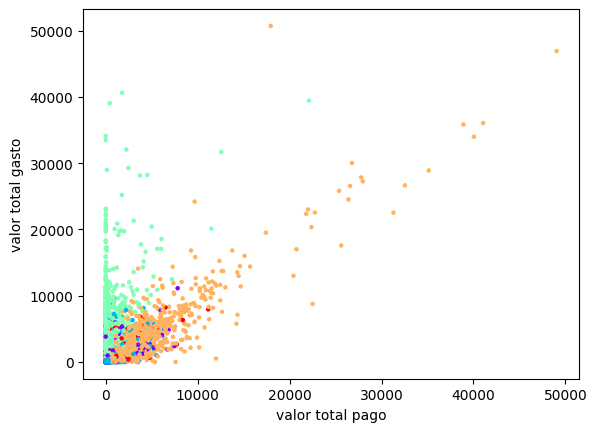

In [ ]:
#Gerando gráficos

import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

In [ ]:
import seaborn as sns
dataframe["cluster"] = labels
#sns.pairplot(dataframe[0:], hue="cluster")

In [ ]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        1074.0  1794.443291  1981.773996   0.000000   507.348768   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        1087.920500  2312.923253  14581.459140            1074.0  0.862388   
3         554.332740  1370.859355  19043.138560            1536.0  0.928220   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.593643   8345.641905           2649.0  0.001799   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...       883.991828  21235.065300           1074.0  0.117321   
3        ...       524.184580  18621.013310           1536.0  0.278331   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023260  0.0  0.0  0.000000  0.000000  0.6  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.186720  0.0  0.0  0.083333  0.142857  1.0  
3        0.367137  0.0  0.0  0.083333  0.545455  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [ ]:
centroids = kmeans.cluster_centers_ #utilizar os centroides, analisar a variancia queremos o com maior variancia pois fora mais relevantes para divisão
print(centroids)

[[5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [2.34955101e-01 2.16241674e-04 6.09376425e-02 3.48207303e-02
  2.61221122e-02 3.99771273e-01 5.27678241e-05 2.06705276e-05
  3.52208917e-05 6.53734596e-05 1.56898861e-03 1.12880913e-03
  5.35553118e-01 5.97717529e-01 1.04179623e-01 2.76913169e-05]
 [1.60024706e-01 2.45463238e-04 4.38782328e-01 2.57144577e-01
  1.81809709e-01 2.53743879e-02 2.04517615e-04 8.90287035e-05
  1.50743855e-04 9.35680559e-06 1.69153111e-04 6.17796821e-03
  6.03613847e-01 4.02560302e-01 8.55015664e-02 7.20337923e-05]
 [3.

In [ ]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280


In [ ]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2649.0,3037.962543,2478.838161,6.824905,1256.612223,2174.018945,4223.867789,18495.558550
1,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126095,9630.367575
2,1074.0,1794.443291,1981.773996,0.000000,507.348768,1087.920500,2312.923253,14581.459140
3,1536.0,1142.514535,1664.888183,0.000000,212.178230,554.332740,1370.859355,19043.138560
4,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850


In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376
1         443.746756   629.249107    141.482978   5130.547795   814.294226
2        1794.443291   478.411620   3266.686592   3983.399639  4712.044614
3        1142.514535  3274.126719    181.727235   4096.718849  3036.609179
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911


<ipython-input-26-92754d34d3f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
1         443.746756   629.249107    141.482978   5130.547795   814.294226   
2        1794.443291   478.411620   3266.686592   3983.399639  4712.044614   
3        1142.514535  3274.126719    181.727235   4096.718849  3036.609179   
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911   

         n_clients  
cluster             
0             2649  
1             3280  
2             1074  
3             1536  
4              411  


<ipython-input-27-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.